In [17]:
%matplotlib inline

import os
import sys

try:
    current_path=os.path.dirname(os.path.realpath(__file__))
except NameError:
    current_path=os.getcwd()

for i in range(3):
    sys.path.append(current_path)
    current_path=os.path.dirname(current_path)

from param_global import *

In [18]:
#The word image and img usually refers to np.ndarray

In [3]:
def image_resize(image,dim = (128, 128)):
    #Args: image in the form of np.ndarray and the dimension to which it has to be resized
    image_resized=cv2.resize(image, dim, interpolation = cv2.INTER_CUBIC)
    return image_resized

In [4]:
#def image_transform(image, n45=0, flip=False):
#    x = image.shape[0]
#    matrix = cv2.getRotationMatrix2D(center=(x/2,x/2), angle=0, scale=1)
#    if flip
#    cv2.

In [30]:
rotation_flip = [(angle*45, flip) for angle in [0,1,2,3] for flip in [False, True]]
def next_rotation_flip(rotation_flip):
    rf = rotation_flip.pop(0)
    rotation_flip.append(rf)
    return rf


def transform_next(X):
    rotation, flip = next_rotation_flip(rotation_flip)
    Y = np.rollaxis(X, 0,3) # Send the image dimension to the back
    length = Y.shape[0]
    if flip:
        Y = cv2.flip(Y,0)
    matrix = cv2.getRotationMatrix2D(center=(length/2,length/2), angle=rotation, scale=1)
    Z = cv2.warpAffine(Y, matrix, (length, length))
    yield np.rollaxis(Z,-1) # Bring back the image dimension in front
    


In [ ]:
rotation_flip = [(45*angle, flip) for angle in [0,1,2,3] for flip in ]

In [15]:
img = sample_data_object[0].g_image
x = img.shape[0]
img3 = np.stack([img,img])

#result = cv2.warpAffine(img,matrix,img.shape)
#plot_images([img, result])

In [61]:
img3 = np.stack([img,img])
img3

array([[[ 0.00194255,  0.0123069 , -0.00388987, ..., -0.00902194,
         -0.0208717 ,  0.00127403],
        [-0.0103175 ,  0.00582302, -0.00433089, ..., -0.0192575 ,
          0.00546141, -0.0033391 ],
        [ 0.0150856 ,  0.0283777 , -0.00839354, ..., -0.0058951 ,
         -0.0225236 , -0.00156131],
        ..., 
        [-0.0183869 , -0.0283322 ,  0.00261645, ...,  0.0178768 ,
          0.0119266 ,  0.0115735 ],
        [ 0.00703166,  0.00051952,  0.00383276, ..., -0.0061862 ,
          0.00603453, -0.00277312],
        [ 0.0115253 ,  0.030939  , -0.00093913, ...,  0.00659551,
          0.0196361 , -0.0269248 ]],

       [[ 0.00194255,  0.0123069 , -0.00388987, ..., -0.00902194,
         -0.0208717 ,  0.00127403],
        [-0.0103175 ,  0.00582302, -0.00433089, ..., -0.0192575 ,
          0.00546141, -0.0033391 ],
        [ 0.0150856 ,  0.0283777 , -0.00839354, ..., -0.0058951 ,
         -0.0225236 , -0.00156131],
        ..., 
        [-0.0183869 , -0.0283322 ,  0.00261645, ...,

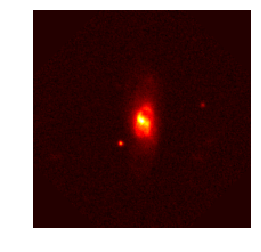

In [94]:
plot_images([next(transform_next(img3))[0,:,:]])

In [54]:
next(transform_next(img3))

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]])

In [200]:
x = np.zeros((1,2,3))
np.rollaxis(x,0,3).shape

(2, 3, 1)

In [157]:
rotation_flip = [(angle*45, flip) for angle in [0,1,2,3] for flip in [False, True]]
def transform_next(X):
    rotation, flip = rotation_flip.pop(0)
    rotation_flip.append((rotation, flip))
    Y = np.rollaxis(X, 0,3) # Send the image dimension to the back
    length = Y.shape[0]
    if flip:
        Y = cv2.flip(Y,0)
    matrix = cv2.getRotationMatrix2D(center=(length/2,length/2), angle=rotation, scale=1)
    Z = cv2.warpAffine(Y, matrix, (length, length))
    Z = np.rollaxis(Z,-1)
    yield (Z,Z)

In [199]:
next(transform_next(img3))

(array([[[ 0.0115253 ,  0.030939  , -0.00093913, ...,  0.00659551,
           0.0196361 , -0.0269248 ],
         [ 0.00703166,  0.00051952,  0.00383276, ..., -0.0061862 ,
           0.00603453, -0.00277312],
         [-0.0183869 , -0.0283322 ,  0.00261645, ...,  0.0178768 ,
           0.0119266 ,  0.0115735 ],
         ..., 
         [ 0.0150856 ,  0.0283777 , -0.00839354, ..., -0.0058951 ,
          -0.0225236 , -0.00156131],
         [-0.0103175 ,  0.00582302, -0.00433089, ..., -0.0192575 ,
           0.00546141, -0.0033391 ],
         [ 0.00194255,  0.0123069 , -0.00388987, ..., -0.00902194,
          -0.0208717 ,  0.00127403]],
 
        [[ 0.0115253 ,  0.030939  , -0.00093913, ...,  0.00659551,
           0.0196361 , -0.0269248 ],
         [ 0.00703166,  0.00051952,  0.00383276, ..., -0.0061862 ,
           0.00603453, -0.00277312],
         [-0.0183869 , -0.0283322 ,  0.00261645, ...,  0.0178768 ,
           0.0119266 ,  0.0115735 ],
         ..., 
         [ 0.0150856 ,  0.02837

In [57]:
cv2.flip(sample_data_object[0].g_image,0)

array([[ 0.0115253 ,  0.030939  , -0.00093913, ...,  0.00659551,
         0.0196361 , -0.0269248 ],
       [ 0.00703166,  0.00051952,  0.00383276, ..., -0.0061862 ,
         0.00603453, -0.00277312],
       [-0.0183869 , -0.0283322 ,  0.00261645, ...,  0.0178768 ,
         0.0119266 ,  0.0115735 ],
       ..., 
       [ 0.0150856 ,  0.0283777 , -0.00839354, ..., -0.0058951 ,
        -0.0225236 , -0.00156131],
       [-0.0103175 ,  0.00582302, -0.00433089, ..., -0.0192575 ,
         0.00546141, -0.0033391 ],
       [ 0.00194255,  0.0123069 , -0.00388987, ..., -0.00902194,
        -0.0208717 ,  0.00127403]])

In [3]:

for i in range(16):
    print(rotation_flip)
    print(next_rotation_flip(rotation_flip))
    

[(0, False), (0, True), (45, False), (45, True), (90, False), (90, True), (135, False), (135, True)]
(0, False)
[(0, True), (45, False), (45, True), (90, False), (90, True), (135, False), (135, True), (0, False)]
(0, True)
[(45, False), (45, True), (90, False), (90, True), (135, False), (135, True), (0, False), (0, True)]
(45, False)
[(45, True), (90, False), (90, True), (135, False), (135, True), (0, False), (0, True), (45, False)]
(45, True)
[(90, False), (90, True), (135, False), (135, True), (0, False), (0, True), (45, False), (45, True)]
(90, False)
[(90, True), (135, False), (135, True), (0, False), (0, True), (45, False), (45, True), (90, False)]
(90, True)
[(135, False), (135, True), (0, False), (0, True), (45, False), (45, True), (90, False), (90, True)]
(135, False)
[(135, True), (0, False), (0, True), (45, False), (45, True), (90, False), (90, True), (135, False)]
(135, True)
[(0, False), (0, True), (45, False), (45, True), (90, False), (90, True), (135, False), (135, True)]

In [5]:
def image_2d_to_3d(image):
    #Args: Pass in a 2d dimensional image and get back the same image as 3d
    reshaped_image=image.reshape(image.shape[0],image.shape[1],1)
    return reshaped_image
    

In [6]:
def plot_images(images):
    #Args: List of images to be plotted
    for i,img in enumerate(images):
        plt.subplot(1,len(images),i+1)
        img=plt.imshow(img)
        img.set_cmap('hot')
        plt.axis("off")

In [7]:
class data(object):
    #An object with SDSS_ID, logMstar, err_logMstar, Distance, image_data_dir,i_image and g_image.
    #It has functions such as plot_image to get the image and the image resized to dims in the argument
    
    def generate_i_Image(self):
        if os.path.exists(os.path.join(self.image_data_dir,self.SDSS_ID+"-i.csv")):
            image_df=pd.read_csv(os.path.join(self.image_data_dir,self.SDSS_ID+"-i.csv"),header=None)
            
            return image_df.as_matrix()
        else:
            return None
    def generate_g_Image(self):
        if os.path.exists(os.path.join(self.image_data_dir,self.SDSS_ID+"-g.csv")):
            image_df=pd.read_csv(os.path.join(self.image_data_dir,self.SDSS_ID+"-g.csv"),header=None)
            return image_df.as_matrix()
        else:
            return None
    
    
    def __init__(self,SDSS_ID,logMstar,err_logMstar,Distance,image_data_dir):
        self.SDSS_ID=SDSS_ID
        self.logMstar=logMstar
        self.err_logMstar=err_logMstar
        self.Distance=Distance
        self.image_data_dir=image_data_dir
        self.i_image=self.generate_i_Image()
        self.g_image=self.generate_g_Image() 
        

        if self.i_image!=None:
            self.i_image_resized=image_resize(self.i_image)
        else:
            self.i_image_resized=None
            
        if self.g_image!=None:
            self.g_image_resized=image_resize(self.g_image)
        else:
            self.g_image_resized=None
            
        if self.i_image_resized!=None:
            self.i_image_resized_reshaped=image_2d_to_3d(self.i_image_resized)
        else:
            self.i_image_resized_reshaped=None
        
        if self.g_image_resized!=None:
            self.g_image_resized_reshaped=image_2d_to_3d(self.g_image_resized)
        else:
            self.g_image_resized_reshaped=None
            
    def plot_image(self):
        if self.i_image!=None:
            plt.subplot(121)
            img=plt.imshow(self.i_image)
            img.set_cmap('hot')
            plt.title("I band Image")
            plt.axis('off')
        if self.g_image!=None:
            plt.subplot(122)
            img=plt.imshow(self.g_image)
            plt.title("G band Image")
            img.set_cmap('hot')
            plt.axis('off')
        plt.figure()
        if self.i_image_resized!=None:
            plt.subplot(121)
            img=plt.imshow(self.i_image_resized)
            img.set_cmap('hot')
            plt.title("I band Resized Image")
            plt.axis('off')
        if self.g_image_resized!=None:
            plt.subplot(122)
            img=plt.imshow(self.g_image_resized)
            plt.title("G band Resized Image")
            img.set_cmap('hot')
            plt.axis('off')
   

In [8]:
def read_target_data_csv(target_data_csv_path):
    #Args: target data csv path
    target_data_df=pd.read_csv(target_data_csv_path,sep=";",dtype={"SDSS_ID":str,'logMstar':np.float64, 'err_logMstar':np.float64, 'Distance':np.float64})
    return target_data_df
    

In [9]:
def get_Data(target_data_df,image_data_path):
    # Arg: a Dataframe of the target data and the path of the images
    # Returns a list of data objects
    
    data_objects=[]
    for index in range(len(target_data_df)):
        SDSS_ID=target_data_df.iloc[index]["SDSS_ID"]
        logMstar=target_data_df.iloc[index]["logMstar"]
        err_logMstar=target_data_df.iloc[index]["err_logMstar"]
        Distance=target_data_df.iloc[index]["Distance"]

        data_objects.append(data(SDSS_ID,logMstar,err_logMstar,Distance,image_data_path))
    return data_objects

In [10]:
# Read the target data csv which has SDSS_ID and distance along with logMstar

target_data_csv_path=os.path.join(data_path,"sample.csv")
sample_target_data_df=read_target_data_csv(target_data_csv_path)

# Pass on this dataframe of the targetdata and the image data directory and get back a list of objects of the data
sample_data_object=get_Data(sample_target_data_df,sample_data_path)

In [11]:
obj = sample_data_object[0]

In [12]:
gs = [obj.i_image_resized  for obj in sample_data_object]
#plot_images(np.digitize(obj.i_image_resized, bins=np.linspace(0,obj.i_image_resized.max,128))

In [14]:
np.digitize(obj.i_image_resized, bins=np.linspace(0,obj.i_image_resized.max(),128))


AttributeError: 'numpy.ndarray' object has no attribute 'i_image_resized'

In [37]:
img = obj.i_image_resized


In [31]:
def clean_stars(img):
    mask = img >= np.percentile(img, 96)
    lbl = label(mask, background=0)
    center_label = lbl[64,64]
    galaxy = lbl == center_label
    stars = (lbl != center_label) & (lbl != 0) 
    image_clean = img / (1+ 5* stars + distance_transform_edt(~galaxy))
    return mask, galaxy, lbl, image_clean

In [68]:
cs = [clean_stars(img) for img in gs[:500]] 

In [66]:
from skimage.measure import label
from scipy.ndimage.morphology import distance_transform_edt
from sklearn.decomposition import PCA
def clean_stars(img):
    mask = img >= np.percentile(img, 96)
    lbl = label(mask, background=0)
    center_label = lbl[64,64]
    galaxy = lbl == center_label
    stars = (lbl != center_label) & (lbl != 0) 
    image_clean = img / (1+ 5* stars + distance_transform_edt(~galaxy))
    return mask, galaxy, lbl, image_clean
def get_features(img):
    f = {}
    __, galaxy, lbl, image_clean = clean_stars(img)
    f['flux'] = img[galaxy].sum()
    gxy = np.array(np.nonzero(galaxy)).T
    gxy_centered = gxy - gxy.mean(axis=0, keepdims=True)
    pca = PCA().fit(gxy_centered)
    f['pca_eigen1'] = pca.explained_variance_[0]
    f['pca_eigen2'] = pca.explained_variance_[1]
    f['ellipticity'] = f['pca_eigen1'] / f['pca_eigen2']
    f['minx'] = gxy[:,0].min()
    f['maxx'] = gxy[:,0].max()
    f['miny'] = gxy[:,1].min()
    f['maxy'] = gxy[:,1].max()
    distances = np.linalg.norm(gxy_centered, axis=1)
    f['max_dist'] = distances.max()
    f['median_dist'] = np.median(distances)
    f['2d_first_moment'] = (distances * distances * img[np.nonzero(galaxy)]).sum()
    return f

In [63]:
f = {}
__, galaxy, lbl, image_clean = clean_stars(img)
f['flux'] = img[galaxy].sum()
gxy = np.array(np.nonzero(galaxy)).T
gxy_centered = gxy - gxy.mean(axis=0, keepdims=True)
pca = PCA().fit(gxy_centered)
f['pca_eigen1'] = pca.explained_variance_[0]
f['pca_eigen2'] = pca.explained_variance_[1]
f['ellipticity'] = f['pca_eigen1'] / f['pca_eigen2']
f['minx'] = gxy[0].min()
f['maxx'] = gxy[0].max()
f['miny'] = gxy[1].min()
f['maxy'] = gxy[1].max()
distances = np.linalg.norm(gxy_centered, axis=1)
f['max_dist'] = distances.max()
f['median_dist'] = np.median(distances)
f['2d_first_moment'] = (distances*distances * img[np.nonzero(galaxy)]).sum()

In [65]:
gxy[0]

array([47, 65])

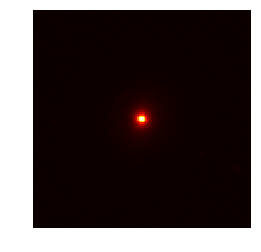

In [49]:
plot_images([img])

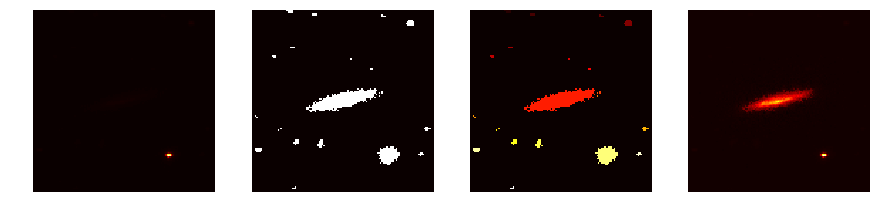

{'flux': 154.21616430729659, 'pca_eigen1': 157.40704104456844, 'pca_eigen2': 6.8529441085636718, 'ellipticity': 22.969257964305772, 'minx': 55, 'maxx': 71, 'miny': 38, 'maxy': 87, 'max_dist': 26.002992750361084, 'median_dist': 10.29474761462771, '2d_first_moment': 18903.908690172393}


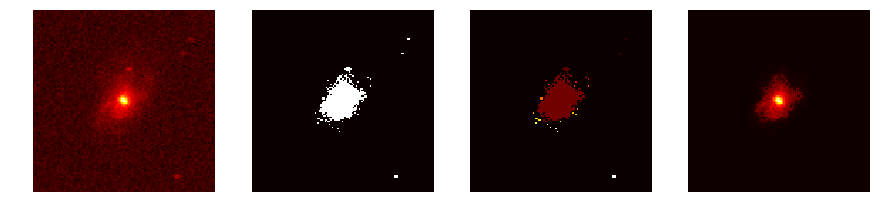

{'flux': 230.22279146930219, 'pca_eigen1': 69.544040068226977, 'pca_eigen2': 39.316841019130436, 'ellipticity': 1.7688104706679986, 'minx': 45, 'maxx': 78, 'miny': 47, 'maxy': 80, 'max_dist': 18.946779178179391, 'median_dist': 9.8185325646228794, '2d_first_moment': 18083.282593269032}


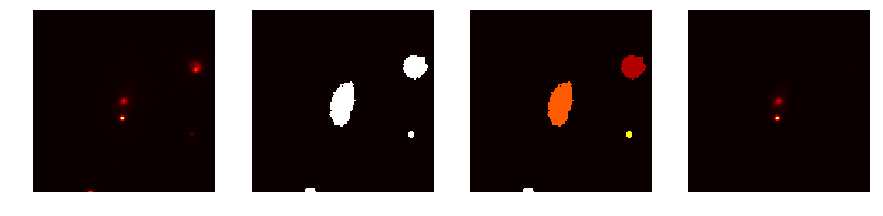

{'flux': 993.36814410554007, 'pca_eigen1': 64.516857122507432, 'pca_eigen2': 16.1703898473497, 'ellipticity': 3.9898145766152719, 'minx': 50, 'maxx': 81, 'miny': 54, 'maxy': 72, 'max_dist': 16.632406397040914, 'median_dist': 8.0291572718733697, '2d_first_moment': 62142.636751582759}


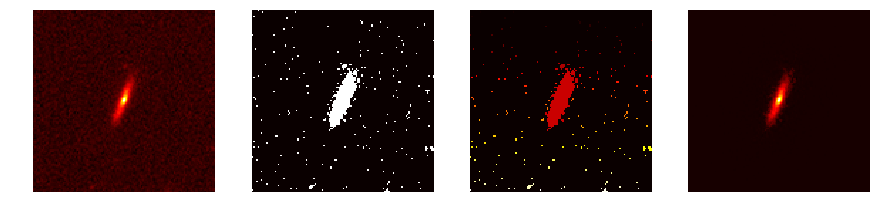

{'flux': 154.84307603937339, 'pca_eigen1': 126.61491852921188, 'pca_eigen2': 9.7194241625661952, 'ellipticity': 13.026997938505655, 'minx': 41, 'maxx': 84, 'miny': 53, 'maxy': 75, 'max_dist': 24.006670878741236, 'median_dist': 9.6693267924624529, '2d_first_moment': 12850.495054110772}


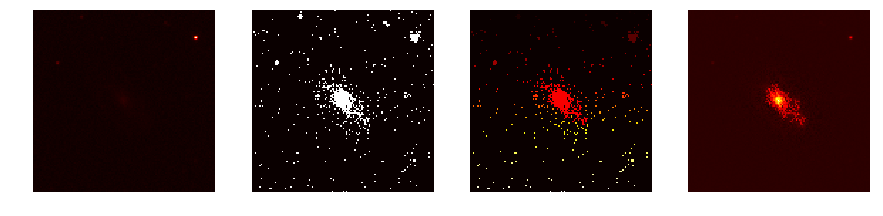

{'flux': 42.326586947025433, 'pca_eigen1': 67.442203687872848, 'pca_eigen2': 13.492122484002159, 'ellipticity': 4.9986355940542504, 'minx': 52, 'maxx': 80, 'miny': 54, 'maxy': 82, 'max_dist': 20.710505759834184, 'median_dist': 7.2964062552911511, '2d_first_moment': 2747.3541882234294}


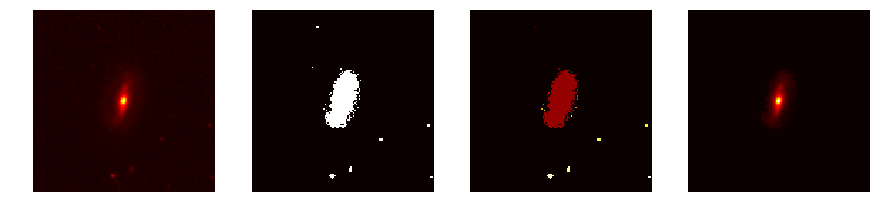

{'flux': 362.9769773825189, 'pca_eigen1': 120.72311759134335, 'pca_eigen2': 21.276438762534699, 'ellipticity': 5.6740283906873801, 'minx': 42, 'maxx': 82, 'miny': 51, 'maxy': 75, 'max_dist': 21.344536992766919, 'median_dist': 10.484650957338175, '2d_first_moment': 29221.277417724828}


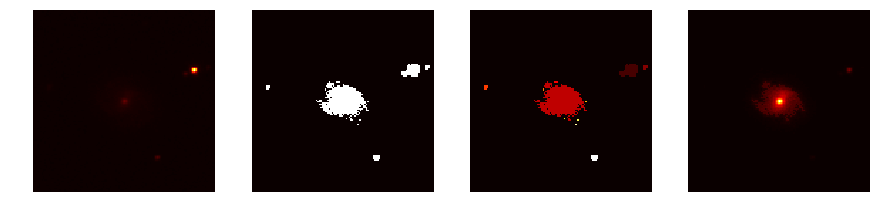

{'flux': 420.14902577173598, 'pca_eigen1': 62.143330182369347, 'pca_eigen2': 33.717673692696216, 'ellipticity': 1.8430491601747299, 'minx': 50, 'maxx': 77, 'miny': 45, 'maxy': 81, 'max_dist': 18.596141455715085, 'median_dist': 9.2016026029298956, '2d_first_moment': 27872.801501953978}


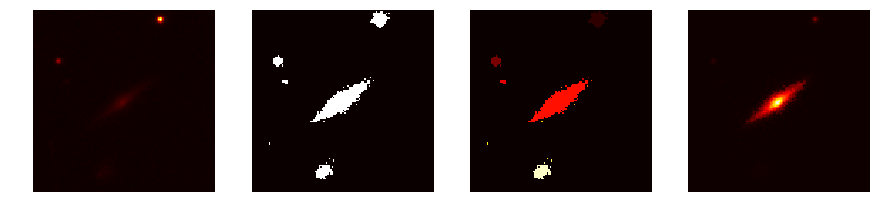

{'flux': 224.59379596067402, 'pca_eigen1': 129.61175118186824, 'pca_eigen2': 9.1303899247393865, 'ellipticity': 14.195642491749094, 'minx': 49, 'maxx': 78, 'miny': 41, 'maxy': 82, 'max_dist': 25.748797590178732, 'median_dist': 9.0895074039102894, '2d_first_moment': 20068.209974036221}


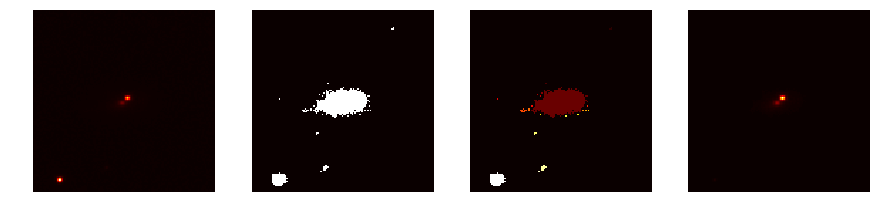

{'flux': 633.73237399222944, 'pca_eigen1': 86.873061453621489, 'pca_eigen2': 22.006062789881522, 'ellipticity': 3.9476876115052293, 'minx': 54, 'maxx': 75, 'miny': 43, 'maxy': 82, 'max_dist': 20.979597643089608, 'median_dist': 9.3717821463656623, '2d_first_moment': 27998.801755938606}


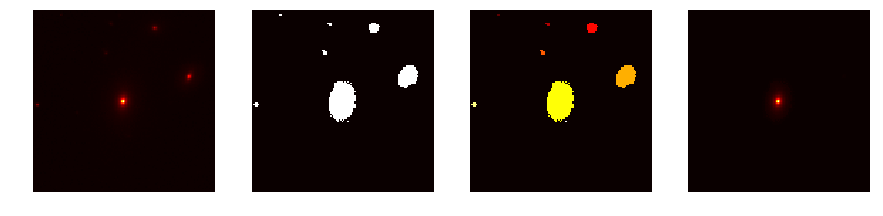

{'flux': 587.27312543458243, 'pca_eigen1': 50.907540369221714, 'pca_eigen2': 22.082506790870713, 'ellipticity': 2.3053333958564779, 'minx': 50, 'maxx': 78, 'miny': 54, 'maxy': 72, 'max_dist': 14.742053271443885, 'median_dist': 8.1610804205254723, '2d_first_moment': 20013.534680915414}


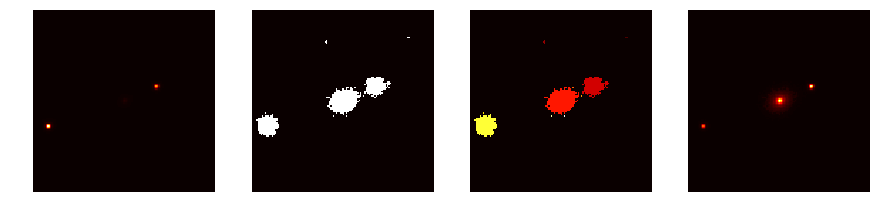

{'flux': 256.41124261268601, 'pca_eigen1': 32.572892478478941, 'pca_eigen2': 18.368596643632678, 'ellipticity': 1.773292381036091, 'minx': 54, 'maxx': 73, 'miny': 52, 'maxy': 76, 'max_dist': 13.010764289155174, 'median_dist': 6.9278173970881518, '2d_first_moment': 6471.8350769817971}


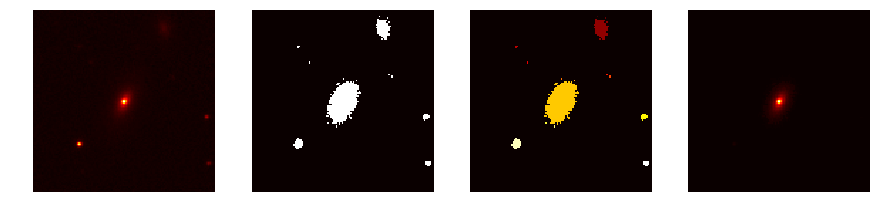

{'flux': 316.53171851816734, 'pca_eigen1': 64.274266841370604, 'pca_eigen2': 22.473564210960465, 'ellipticity': 2.8599943577273663, 'minx': 50, 'maxx': 80, 'miny': 52, 'maxy': 76, 'max_dist': 16.610374151797135, 'median_dist': 8.6346312778350729, '2d_first_moment': 13315.167421969691}


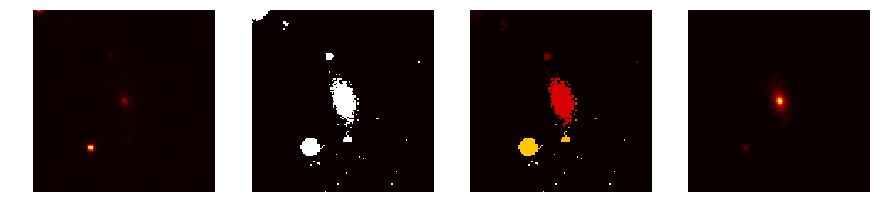

{'flux': 170.45098324237426, 'pca_eigen1': 59.967813534284588, 'pca_eigen2': 14.871903675802969, 'ellipticity': 4.0322889955140049, 'minx': 48, 'maxx': 81, 'miny': 55, 'maxy': 72, 'max_dist': 17.916095936786093, 'median_dist': 7.5277755875846166, '2d_first_moment': 5835.1338104939696}


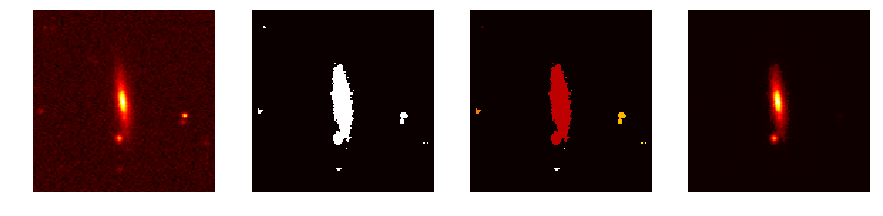

{'flux': 332.78441725579773, 'pca_eigen1': 209.91949598260598, 'pca_eigen2': 12.795887953553615, 'ellipticity': 16.405230863584428, 'minx': 38, 'maxx': 94, 'miny': 55, 'maxy': 71, 'max_dist': 28.406264191190665, 'median_dist': 11.826603587518674, '2d_first_moment': 51325.588220378864}


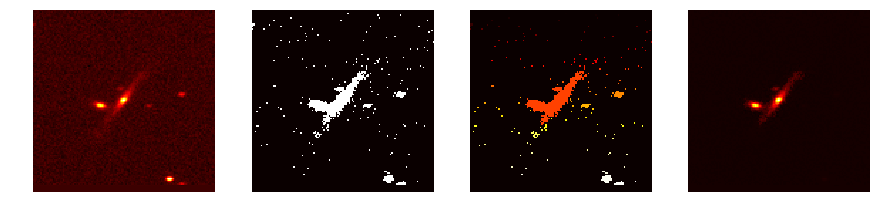

{'flux': 123.22866571249443, 'pca_eigen1': 148.41067978243078, 'pca_eigen2': 20.063955612749879, 'ellipticity': 7.3968803882381717, 'minx': 43, 'maxx': 80, 'miny': 39, 'maxy': 81, 'max_dist': 27.551755955481948, 'median_dist': 10.739513438419596, '2d_first_moment': 14624.272749698932}


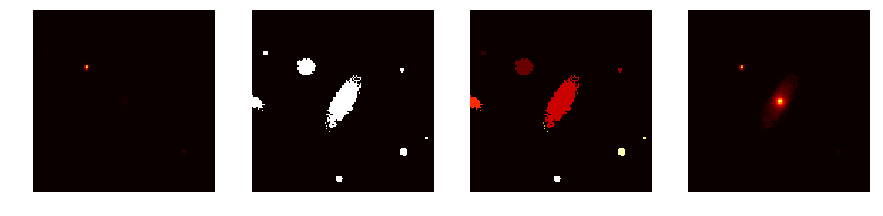

{'flux': 336.40675054562757, 'pca_eigen1': 91.688151962231743, 'pca_eigen2': 13.168410387531337, 'ellipticity': 6.9627350047540846, 'minx': 46, 'maxx': 82, 'miny': 52, 'maxy': 76, 'max_dist': 20.571148382727888, 'median_dist': 8.4257986503423652, '2d_first_moment': 18993.097127511544}


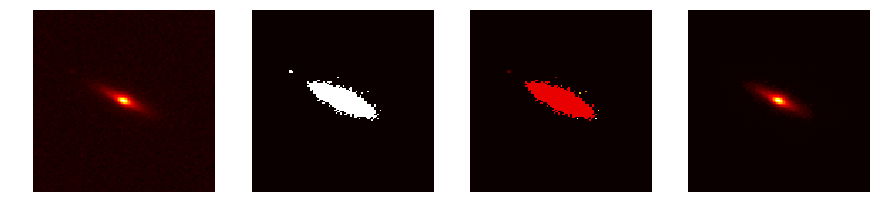

{'flux': 446.9813600944442, 'pca_eigen1': 170.74976663443141, 'pca_eigen2': 16.588974154890018, 'ellipticity': 10.292967186527241, 'minx': 49, 'maxx': 77, 'miny': 39, 'maxy': 88, 'max_dist': 27.578004865805291, 'median_dist': 11.20141431350029, '2d_first_moment': 41606.253809044327}


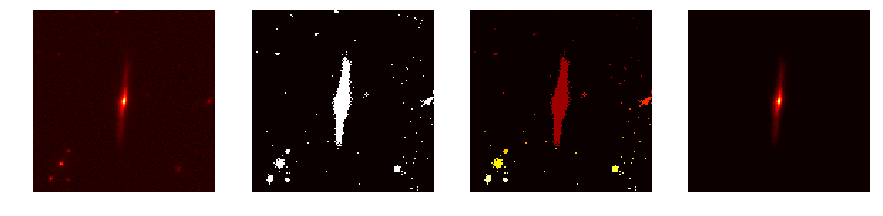

{'flux': 143.18621313548977, 'pca_eigen1': 230.7875933945744, 'pca_eigen2': 6.2306140395708853, 'ellipticity': 37.040906711414465, 'minx': 33, 'maxx': 95, 'miny': 56, 'maxy': 70, 'max_dist': 31.883645126921419, 'median_dist': 11.270531330247104, '2d_first_moment': 17401.420542185013}


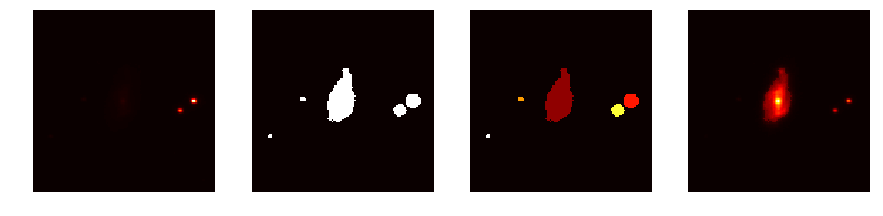

{'flux': 330.48241125797773, 'pca_eigen1': 85.184767430178709, 'pca_eigen2': 19.498136172754663, 'ellipticity': 4.3688671919939699, 'minx': 41, 'maxx': 78, 'miny': 53, 'maxy': 72, 'max_dist': 21.422687258762785, 'median_dist': 8.792310575897897, '2d_first_moment': 26069.716643489035}


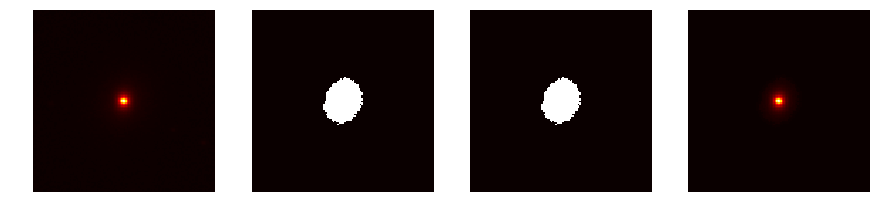

{'flux': 995.14840668365377, 'pca_eigen1': 65.534616659865932, 'pca_eigen2': 42.006114303846132, 'ellipticity': 1.5601208953970185, 'minx': 47, 'maxx': 80, 'miny': 50, 'maxy': 77, 'max_dist': 16.889223025413031, 'median_dist': 10.207237185128427, '2d_first_moment': 46045.803216598782}


In [69]:
for img in gs[20:40]:
    plt.figure(figsize=(15,5))
    mask, galaxy, lbl, image_clean = clean_stars(img)
    plot_images([img, mask, lbl, image_clean])
    plt.show()
    print(get_features(img))

[ 849.25326963  678.34264914]


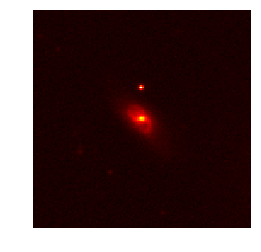

[ 1084.62794531   555.55367217]


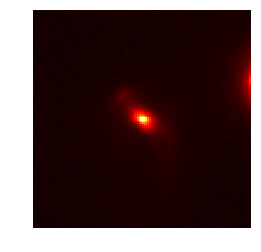

[ 1142.18444988   950.67391934]


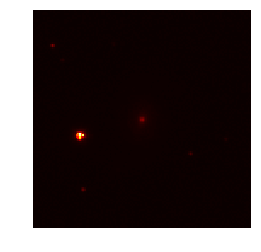

[ 1128.7604894    960.68332201]


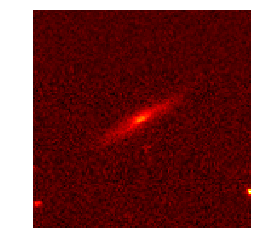

[ 1409.64291376  1118.02855759]


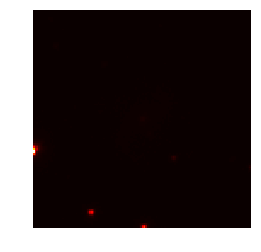

[ 1083.80840803  1071.31032792]


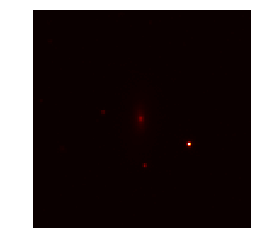

[ 1032.22643691   862.28747425]


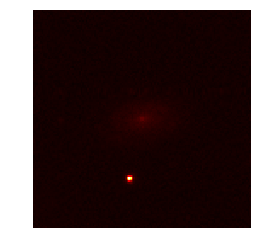

[ 914.28295636  747.9087215 ]


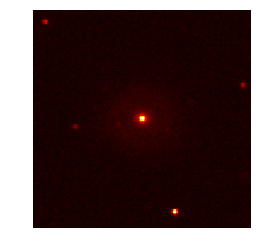

[ 1359.56174402   992.41855006]


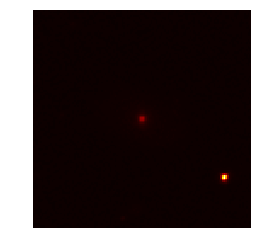

[ 889.35444808  843.27600686]


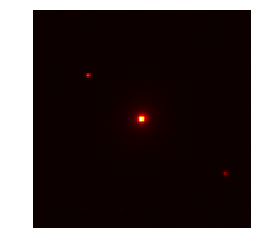

In [23]:
from sklearn.decomposition import PCA
for img in gs[:10]:
    dig = np.digitize(img, bins=np.linspace(0,img.max(),128))
    X = np.array([[i,j] for i in range(img.shape[0]) for j in range(img.shape[1]) for k in range(dig[i,j])])
    pca = PCA().fit(X - X.mean(axis=0, keepdims=True))
    print(pca.explained_variance_)
    plot_images([img])
    plt.show()

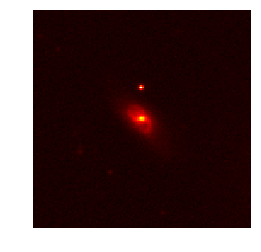

In [20]:
plot_images([img])

In [31]:
with open(os.path.join(sample_data_path,'sample_data_object.p'), 'wb') as handle:
    pickle.dump(sample_data_object, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [32]:
# print(sample_data_object[0].i_image_resized.reshape(1,-1).shape)
# print(sample_data_object[0].g_image_resized.reshape(1,-1).shape)

In [46]:
sample_target_data_df

,SDSS_ID,logMstar,err_logMstar,Distance
0,1237648675066675556,10.566,0.011,164.843146
1,1237648675604987914,10.642,0.026,116.585956
2,1237648675070017789,10.977,0.025,243.848281
3,1237648672921813985,9.585,0.058,187.904105
4,1237648673459667002,9.934,0.043,190.039379
5,1237648673459667234,10.974,0.024,197.299310
6,1237648673458881081,10.315,0.032,253.670541
7,1237648673460585255,10.957,0.016,299.792458
8,1237648673459274344,11.028,0.022,400.577387
9,1237648673995948107,10.299,0.045,116.585956
